<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 202.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 147.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 156.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 156.3 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




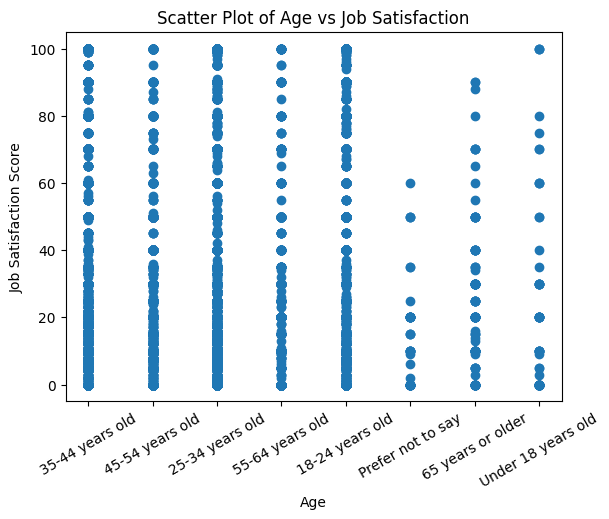

In [4]:
## Write your code here
df_scatter_age = df[['Age','JobSatPoints_6']].dropna()
# Scatter plot
plt.figure()
plt.scatter(df_scatter_age["Age"], df_scatter_age["JobSatPoints_6"])
plt.xlabel("Age")
plt.ylabel("Job Satisfaction Score")
plt.title("Scatter Plot of Age vs Job Satisfaction")
plt.xticks(rotation=30)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


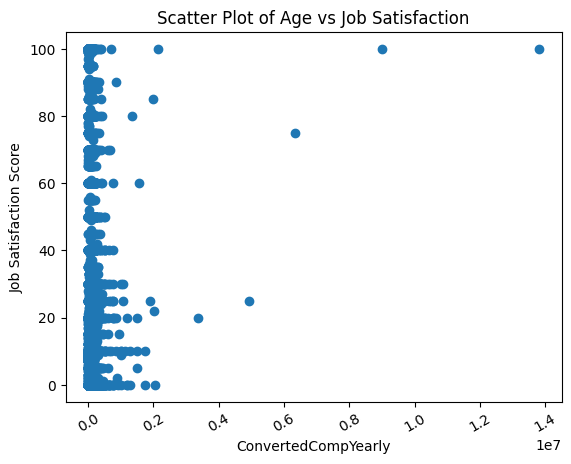

In [6]:
## Write your code here
df_scatter_age = df[['ConvertedCompYearly','JobSatPoints_6']].dropna()
# Scatter plot
plt.figure()
plt.scatter(df_scatter_age["ConvertedCompYearly"], df_scatter_age["JobSatPoints_6"])
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Job Satisfaction Score")
plt.title("Scatter Plot of Age vs Job Satisfaction")
plt.xticks(rotation=30)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [13]:
!pip install numpy
import numpy as np

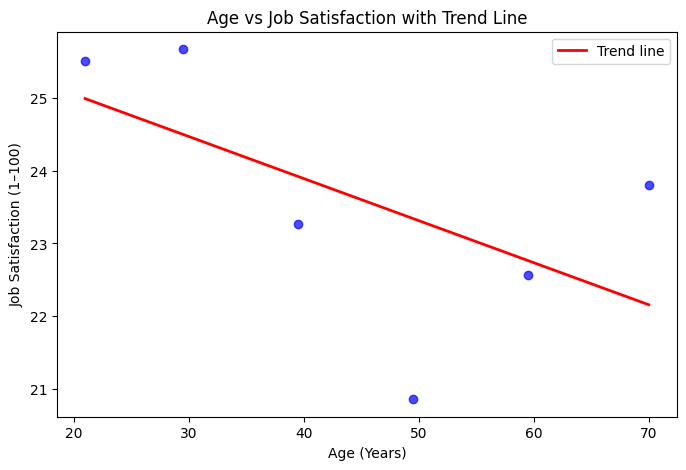

In [15]:
## Write your code here
df_scatter_line = df[['Age','JobSatPoints_6']].dropna()
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df_scatter_line["AgeNum"] = df_scatter_line["Age"].map(age_mapping)
# Aggregate: average JobSatPoints_6 per age
df_agg = df_scatter_line.groupby("AgeNum")["JobSatPoints_6"].mean().reset_index()
df_scatter_line.head()
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df_agg["AgeNum"], df_agg["JobSatPoints_6"], alpha=0.7, color="blue")

# Linear regression (trend line)
z = np.polyfit(df_agg["AgeNum"], df_agg["JobSatPoints_6"], 1)
p = np.poly1d(z)
plt.plot(df_agg["AgeNum"], p(df_agg["AgeNum"]), color="red", linewidth=2, label="Trend line")

# Labels and title
plt.xlabel("Age (Years)")
plt.ylabel("Job Satisfaction (1–100)")
plt.title("Age vs Job Satisfaction with Trend Line")
plt.legend()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


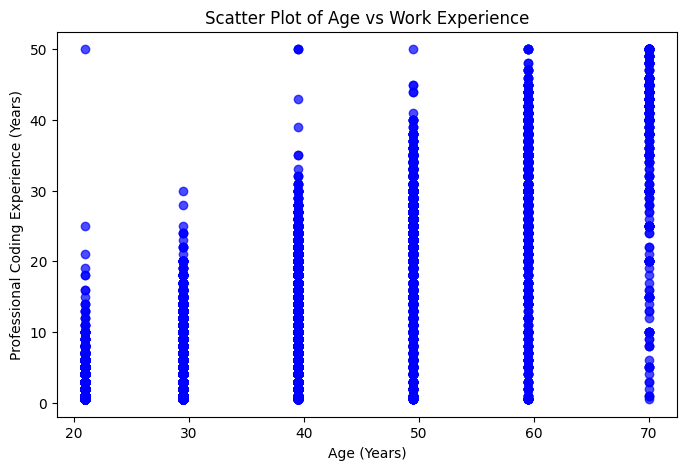

In [18]:
## Write your code here
df_scatter = df[['Age','YearsCodePro']].dropna()
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df_scatter["AgeNum"] = df_scatter ["Age"].map(age_mapping)
df_scatter["YearsCodePro"] = df_scatter["YearsCodePro"].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 50
})
df_scatter["YearsCodePro"] = pd.to_numeric(df_scatter["YearsCodePro"], errors="coerce")

# Aggregate: average JobSatPoints_6 per age
#df_agg = df_scatter_line.groupby("AgeNum")["JobSatPoints_6"].mean().reset_index()
df_scatter .head()
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df_scatter ["AgeNum"], df_scatter ["YearsCodePro"], alpha=0.7, color="blue")
# Labels and title
plt.xlabel("Age (Years)")
plt.ylabel("Professional Coding Experience (Years)")
plt.title("Scatter Plot of Age vs Work Experience")
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


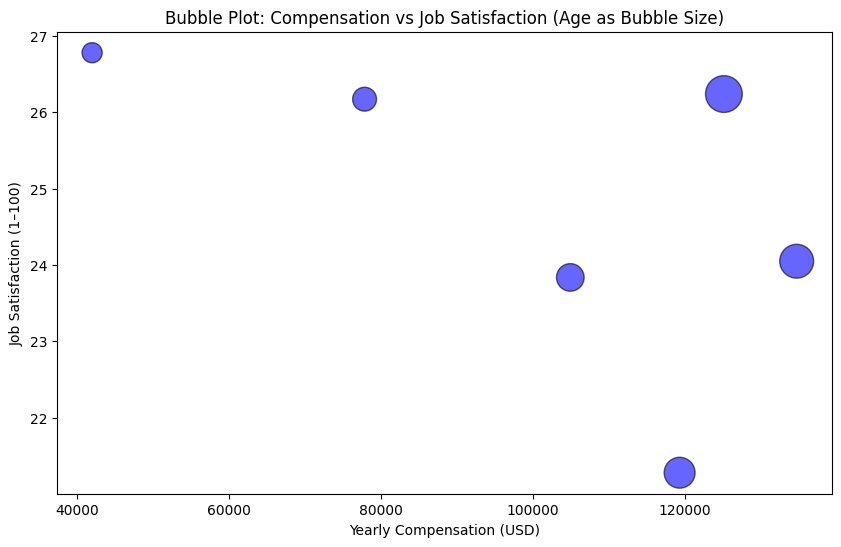

In [26]:
## Write your code here
df_bubble = df[['Age','ConvertedCompYearly','JobSatPoints_6']].dropna()
df_bubble.head(30)
df_grouped = df_bubble.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].mean().reset_index()

age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

df_grouped["AgeNum"] = df_grouped["Age"].map(age_mapping)
plt.figure(figsize=(10,6))

# Bubble size proportional to AgeNum
# You can scale it for visibility: multiply by a factor
bubble_size = df_grouped["AgeNum"] * 10  # adjust factor as needed
#df_grouped = df_bubble.groupby("AgeNum")["ConvertedCompYearly", "JobSatPoints_6"].mean().reset_index()

plt.scatter(
    df_grouped["ConvertedCompYearly"], 
    df_grouped["JobSatPoints_6"], 
    s=bubble_size,  # bubble size
    alpha=0.6, 
    color="blue",
    edgecolor="black"
)

plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (1–100)")
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Age as Bubble Size)")

plt.show()
#bub_data = df_bubble.groupby('')

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [39]:
## Write your code here
df_lang = df[['LanguageHaveWorkedWith','JobSatPoints_6']].dropna()
df_lang.head(20)
# Split languages into lists
df_lang["Languages"] =df_lang["LanguageHaveWorkedWith"].str.split(";")

# Explode so each language is a separate row
df_exploded = df_lang.explode("Languages")
# Count of respondents per language
language_counts = df_exploded["Languages"].value_counts()

# Assign numeric codes to languages for plotting
df_exploded["LangCode"] = df_exploded["Languages"].astype('category').cat.codes
df_exploded.head()
df_exploded_grouped = df_exploded.groupby("Languages")['JobSatPoints_6'].mean().reset_index()

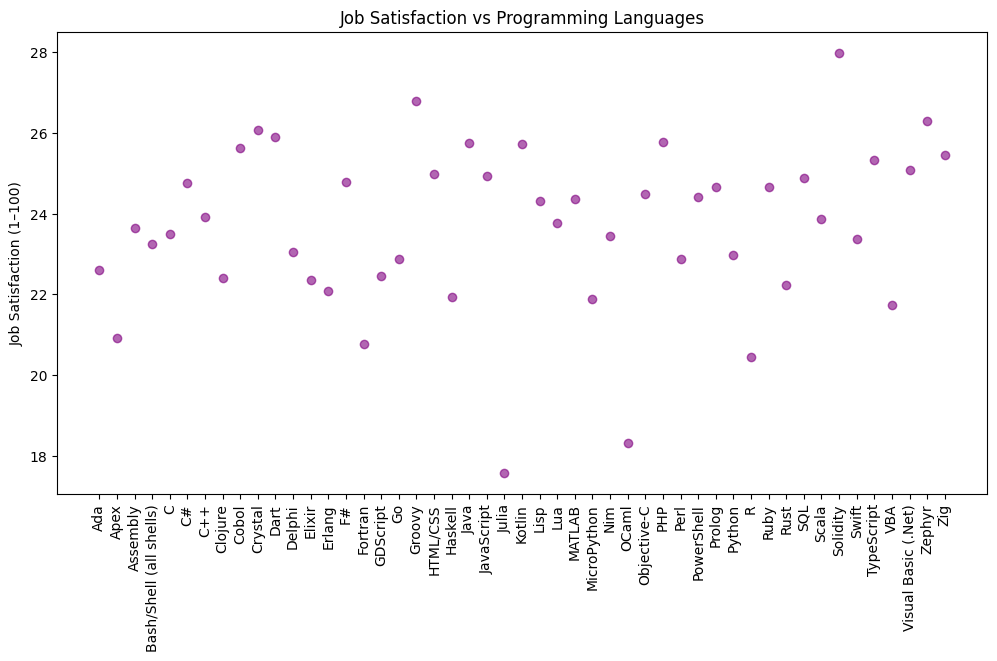

In [40]:

plt.figure(figsize=(12,6))

# Add jitter to x-axis for better visibility
#import numpy as np
#x_jitter = df_exploded["LangCode"] + np.random.normal(0, 0.1, size=len(df_exploded))

plt.scatter(df_exploded_grouped["Languages"], df_exploded_grouped["JobSatPoints_6"], alpha=0.6, color="purple")
plt.ylabel("Job Satisfaction (1–100)")
plt.xticks(rotation=90)
plt.title("Job Satisfaction vs Programming Languages")
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_298/1187945009.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(employment_types))


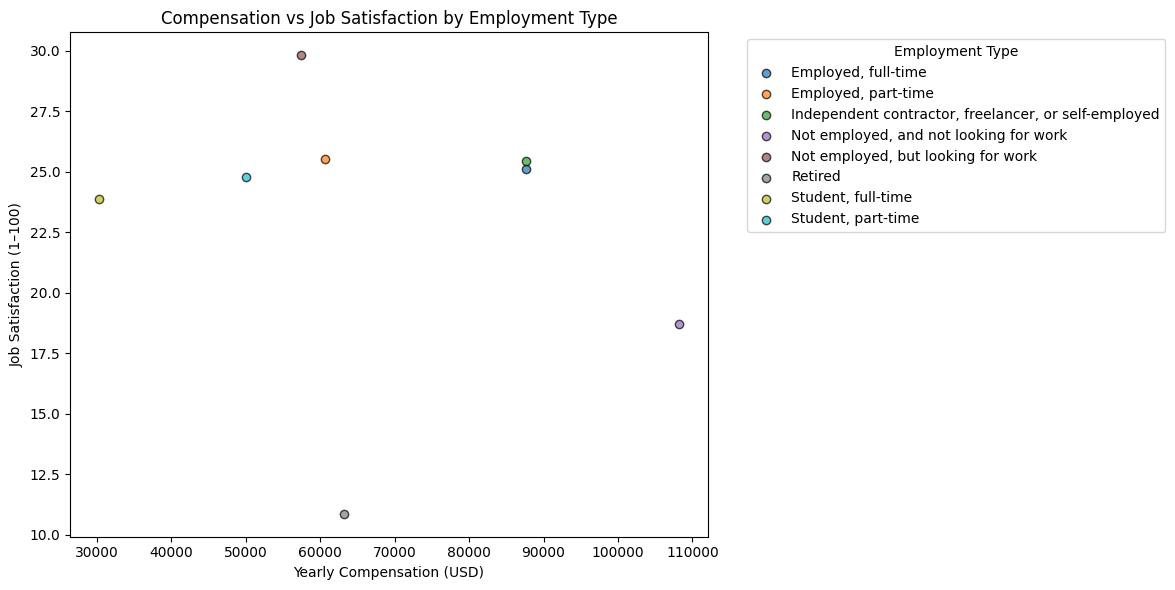

In [47]:
## Write your code here
df_comparison = df[['ConvertedCompYearly','JobSatPoints_6','Employment']].dropna()
# Assign a color for each employment type
df_comparison["Employment"] =df_comparison["Employment"].str.split(";")

# Explode so each language is a separate row
df_exploded = df_comparison.explode("Employment")
df_grouped = df_exploded.groupby('Employment')[['ConvertedCompYearly','JobSatPoints_6']].mean().reset_index()
employment_types = df_grouped["Employment"].unique()
colors = plt.cm.get_cmap('tab10', len(employment_types))

plt.figure(figsize=(12,6))
for i, emp_type in enumerate(employment_types):
    subset = df_grouped[df_grouped["Employment"] == emp_type]
    plt.scatter(
        subset["ConvertedCompYearly"],
        subset["JobSatPoints_6"],
        alpha=0.7,
        color=colors(i),
        label=emp_type,
        edgecolor='black'
    )

plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (1–100)")
plt.title("Compensation vs Job Satisfaction by Employment Type")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_298/617729330.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(countries))  # Color map for countries
/tmp/ipykernel_298/617729330.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


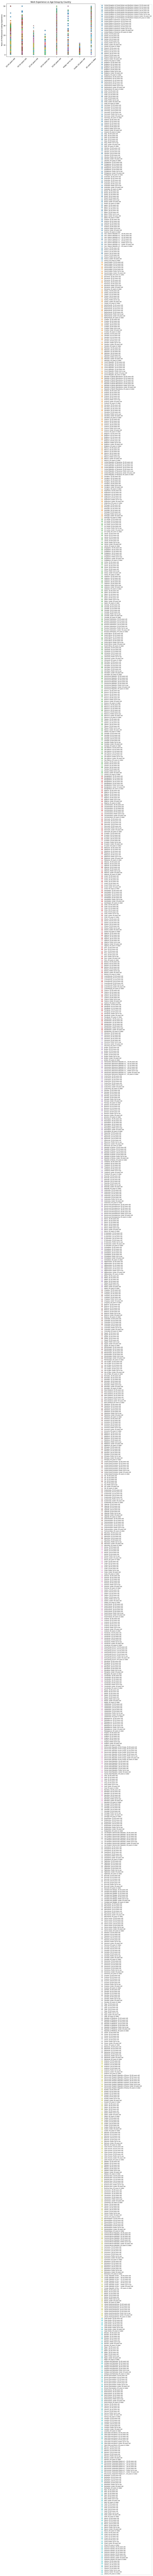

In [56]:
## Write your code here
df_country = df[['YearsCodePro','Age','Country']].dropna()
# Explode so each language is a separate row
# Convert YearsCodePro to numeric
df_country["YearsCodePro"] = df_country["YearsCodePro"].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 50
})
df_country["YearsCodePro"] = pd.to_numeric(df_country["YearsCodePro"], errors="coerce")
#df_grouped = df_country.groupby(["Country,Age"])["YearsCodePro"].mean().reset_index()

# Unique markers for age groups
age_groups = df_country["Age"].unique()
markers = ['o','s','^','D','*']
age_marker_map = {age: markers[i % len(markers)] for i, age in enumerate(age_groups)}
plt.figure(figsize=(10,6))

countries = df_country["Country"].unique()
colors = plt.cm.get_cmap('tab10', len(countries))  # Color map for countries

for i, country in enumerate(countries):
    subset_country = df_country[df_country["Country"] == country]
    for age in age_groups:
        subset = subset_country[subset_country["Age"] == age]
        plt.scatter(
            subset["Age"],  # x-axis = categorical Age
            subset["YearsCodePro"],
            alpha=0.7,
            color=colors(i),
            marker=age_marker_map[age],
            label=f"{country}, {age}"
        )

plt.ylabel("Years of Professional Coding Experience")
plt.title("Work Experience vs Age Group by Country")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
